# PyCPT version 2 for Chile

#### Imports - This cell imports PyCPTv2 libraries 

In [1]:
import pycpt
import packaging
min_version = '2.9'
assert packaging.version.parse(pycpt.__version__) >= packaging.version.parse(min_version), f'This notebook requires version {min_version} or higher of the pycpt library, but you have version {pycpt.__version__}. Please close the notebook, update your environment, and load the notebook again. See https://iri-pycpt.github.io/installation/'

import cptdl as dl 
from cptextras import get_colors_bars
import datetime as dt
import numpy as np
from pathlib import Path
import xarray as xr

In [2]:
dl.setup_dlauth("your email")

You already have an IRIDLAUTH (~/.pycpt_dlauth)!


'74d48db0fe28e7f48e7ab340adc7a04b1c733ba2be2bb00a95a8ada7c5a3b2d9cbb5b88628cdddaede4d3a60fa298d06adf32bcc'

#### Define case directory
The directory where inputs, outputs, and figures generated by this notebook will be stored.

In [3]:
case_dir = Path.home() / "Desktop/PyCPT" / "Chile_station_example"

#### Parameters - This cell defines the parameters of your CPT analysis

In [4]:
dl.observations.update({
    # TODO applying the predictand extent constraints causes a segfault in ingrid.
    #Station data 1981-2017: 467 stations reported precipitation, and 163 stations reported temperatures 
    'CHILESTATIONS_2017.PRCP': "http://iridl.ldeo.columbia.edu/home/.xchourio/.ACToday/.CHL/.prcp/T/{int(lead_high-lead_low)+1}/seasonalAverage/T/%28{targetcenter(target)}%29/VALUES/{int(lead_high-lead_low)+1}/mul/-999/setmissing_value/{'%5B%5D%5BT%5D' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2017.TMAX': "http://iridl.ldeo.columbia.edu/home/.xchourio/.ACToday/.CHL/.tempX/T/{int(lead_high-lead_low)+1}/seasonalAverage/T/%28{targetcenter(target)}%29/VALUES/-999/setmissing_value/{'%5B%5D%5BT%5D' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2017.TMIN': "http://iridl.ldeo.columbia.edu/home/.xchourio/.ACToday/.CHL/.tempN/T/{int(lead_high-lead_low)+1}/seasonalAverage/T/%28{targetcenter(target)}%29/VALUES/-999/setmissing_value/{'%5B%5D%5BT%5D' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    #Station data 1981-2023: 212 stations reported precipitation, and 180 stations reported temperatures 
    'CHILESTATIONS_2020.PRCP': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_prec/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.prcp/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/-999/setmissing_value//name//prcp/def/%3Aa/%7BY/elev/X/Name/prcp%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMAX': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmax/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/-999/setmissing_value//name//tmax/def/%3Aa/%7BY/elev/X/Name/tmax%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMIN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmin/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/-999/setmissing_value//name//tmin/def/%3Aa/%7BY/elev/X/Name/tmin%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMEAN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmean/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/-999/setmissing_value//name//tmean/def/%3Aa/%7BY/elev/X/Name/tmean%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    # Stations Frequency less than 
    'CHILESTATIONS_2020.PRCPFREQ_LT': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.daily_prec/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.prcp/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/-999/setmissing_value//name//days_prcp/def/%3Aa/%7BY/X/Name/days_prcp%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMAXFREQ_LT': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.daily_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmax/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/-999/setmissing_value//name//days_tmax/def/%3Aa/%7BY/X/Name/days_tmax%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMINFREQ_LT': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.daily_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmin/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/-999/setmissing_value//name//days_tmin/def/%3Aa/%7BY/X/Name/days_tmin%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMEANFREQ_LT': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.daily_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmean/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/-999/setmissing_value//name//days_tmean/def/%3Aa/%7BY/X/Name/days_tmean%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    #Stations Frequency greater than 
    'CHILESTATIONS_2020.PRCPFREQ_GT': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.daily_prec/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.prcp/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/-999/setmissing_value//name//days_prcp/def/%3Aa/%7BY/X/Name/days_prcp%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMAXFREQ_GT': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.daily_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmax/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/-999/setmissing_value//name//days_tmax/def/%3Aa/%7BY/X/Name/days_tmax%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMINFREQ_GT': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.daily_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmin/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/-999/setmissing_value//name//days_tmin/def/%3Aa/%7BY/X/Name/days_tmin%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CHILESTATIONS_2020.TMEANFREQ_GT': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.daily_temps/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.label//name//Name/def/%3Aa%3A/.tmean/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/-999/setmissing_value//name//days_tmean/def/%3Aa/%7BY/X/Name/days_tmean%7Dds/{'%5BSTNID%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}",
    
    
    #Grid data 0.05 1960-2021
    'CR2MET0p05.PRCP': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.prcp/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMAX': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmax/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMIN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmin/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMEAN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmean/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
     # Grid data 0.05; Frequency less than 
    'CR2MET0p05.PRCPFREQ_LT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.prcp/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMINFREQ_LT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmin/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMAXFREQ_LT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmax/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMEANFREQ_LT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmean/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    # Grid data 0.05; Frequency greater than 
    'CR2MET0p05.PRCPFREQ_GT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.prcp/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMINFREQ_GT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmin/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMAXFREQ_GT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmax/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p05.TMEANFREQ_GT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmean/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",

    #Grid data 0.25 1960-2021
    'CR2MET0p25.PRCP': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.prcp/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMAX': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmax/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMIN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmin/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMEAN': "https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.monthly/.tmean/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(1%20Dec%20{final_year})/RANGE/T/%28{target}%20{first_year}-{final_year}%29/seasonalAverage/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    # Grid data 0.25; Frequency less than 
    'CR2MET0p25.PRCPFREQ_LT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.prcp/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMINFREQ_LT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmin/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMAXFREQ_LT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmax/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMEANFREQ_LT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmean/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqLT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    # Grid data 0.25; Frequency greater than 
    'CR2MET0p25.PRCPFREQ_GT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.prcp/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMINFREQ_GT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmin/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMAXFREQ_GT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmax/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
    'CR2MET0p25.TMEANFREQ_GT':"https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.0p05/.daily/.tmean/X/first/0.25/last/GRID/Y/first/0.25/last/GRID/T/(1%20Jan%20{first_year})/(31%20Dec%20{final_year})/RANGE/%28{target}%20{first_year}-{final_year}%29/{freq}/0.92/seasonalfreqGT/Y/%28{predictand_extent['south']}%29/%28{predictand_extent['north']}%29/RANGEEDGES/X/%28{predictand_extent['west']}%29/%28{predictand_extent['east']}%29/RANGEEDGES/-999/setmissing_value/{'%5BX/Y%5D%5BT%5Dcptv10.tsv' if filetype == 'cptv10.tsv' else 'data.nc'}",
   
})

In [5]:
MOS = 'CCA' # must be one of 'CCA', 'PCR'

# Use dl.observations.keys() to see all options for predictand 
# and dl.hindcasts.keys() to see all options for predictors.
# Make sure your first_year & final_year are compatible with 
# your selections for your predictors and predictands.
predictor_names = [ "CanSIPSIC3.PRCP", 'SEAS51b.PRCP']
# To download predictand observations from the Data Library, set
#
#   local_predictand_file = None
#
# To read predictand data from a local file instead,
# set local_predictand_file to the full pathname of the file. e.g.
#
#   local_predictand_file = "/home/aaron/src/pycpt_notebooks/obs_PRCP_Oct-Dec.tsv"
#
# The file should be formatted according to the following guidelines:
# https://cpthelp.iri.columbia.edu/CPT_use_input_gridded.html
# https://cpthelp.iri.columbia.edu/CPT_use_input_stations.html

predictand_name = 'CHILESTATIONS_2020.PRCP'
use_dlauth = True
local_predictand_file = None

    
download_args = { 
    # 'fdate':
    #   The initialization date of the model forecasts / hindcasts.
    #   This field is defined by a python datetime.datetime object,
    #   for example: dt.datetime(2022, 5, 1) # YYYY, MM, DD as integers
    #   The year field is only used for forecasts, otherwise ignored.
    #   The day field is only used in subseasonal forecasts, otherwise ignored.
    #   The month field is an integer representing a month - ie, May=5.
    'fdate':  dt.datetime(2023, 5, 1),

    # 'first_year':
    #   The first year of hindcasts you want. **NOT ALL MODELS HAVE ALL YEARS**.
    #   Double check that your model has hindcast data for all years in [first_year, final_year].
    #   This field is defined by a python integer representing a year, e.g. 1993.
    'target_first_year': 1981,  

    # 'final_year':
    #   The final year of hindcasts you want. **NOT ALL MODELS HAVE ALL YEARS**.
    #   Double check that your model has hindcast data for all years in [first_year, final_year].
    #   This field is defined by a python integer representing a year, e.g. 2016.
    'target_final_year': 2021,  

    # 'target': 
    #   Mmm-Mmm indicating the months included in the target period of the forecast. 
    #   This field is defined by a python string, with two three-letter month name abbreviations 
    #   whose first letters are capitalized, and all other letters are lowercase
    #   and who are separated by a dash character. 
    #   For example, if you wanted a JJA target period, you would use 'Jun-Aug'.
    'target': 'Jun',

    # 'predictor_extent':
    #   The geographic bounding box of the climate model data you want to download.
    #   This field is defined by a python dictionary with the keys "north", "south",
    #   "east", and "west", each of which maps to a python integer representing the 
    #   edge of a bounding box. i.e., "north" will be the northernmost boundary,
    #   "south" the southernmost boundary.
    #   Example: {"north": 90, "south": -90, "east": 0, "west": 180}
    'predictor_extent': {
        'west': -80, 
        'east':  -62,
        'south': -60, 
        'north': -12,
      },

    # 'predictand_extent':
    #   The geographic bounding box of the observation data you want to download.
    #   This field is defined by a python dictionary with the keys "north", "south",
    #   "east", and "west", each of which maps to a python integer representing the 
    #   edge of a bounding box. i.e., "north" will be the northernmost boundary,
    #   "south" the southernmost boundary.
    #   Example: {"north": 90, "south": -90, "east": 0, "west": 180}
    'predictand_extent': {
        'west':  -77,
        'east': -65,
        'south': -60,
        'north': -12,
      },

    'use_dlauth': True,

    # 'filetype':
    #   The filetype to be downloaded. for now, it saves a lot of headache just to set this equal
    #   to 'cptv10.tsv' which is a boutique plain-text CPT filetype based on .tsv + metadata.
    'filetype': 'cptv10.tsv'
}

cpt_args = { 
    'transform_predictand': None,  # option curently disabled because it's not working correctly
    'tailoring': None,  # tailoring None, 'Anomaly'
    'cca_modes': (1,3), # minimum and maximum of allowed CCA modes 
    'x_eof_modes': (1,8), # minimum and maximum of allowed X Principal Componenets 
    'y_eof_modes': (1,6), # minimum and maximum of allowed Y Principal Components 
    'validation': 'crossvalidation', # the type of validation to use; only 'crossvalidation' is supported for now
    'drymask_threshold': None, # exclude points whose average value is below this threshold; set to None for no dry mask
    'skillmask_threshold': None, # use climatological forecast for points where Pearson skill is below this threshold; None for no skill mask
    'crossvalidation_window': 5,  # number of samples to leave out in each cross-validation step 
    'synchronous_predictors': True, # whether or not we are using 'synchronous predictors'
}

Set `force_download = False` to avoid re-downloading files you have already downloaded. Note: if you have changed anything in `download_args` since the data were last downloaded, you must set `force_download = True`, otherwise you will use the old data instead of the new.

In [6]:
force_download = True

In [7]:
domain_dir = pycpt.setup(case_dir, download_args["predictor_extent"])

Input data will be saved in /Users/xandre/Desktop/PyCPT/Chile_station_example/-80W--62E_to_-60S--12N/data
Figures will be saved in /Users/xandre/Desktop/PyCPT/Chile_station_example/-80W--62E_to_-60S--12N/figures
Output will be saved in /Users/xandre/Desktop/PyCPT/Chile_station_example/-80W--62E_to_-60S--12N/output


#### Visualize predictor and predictand domains

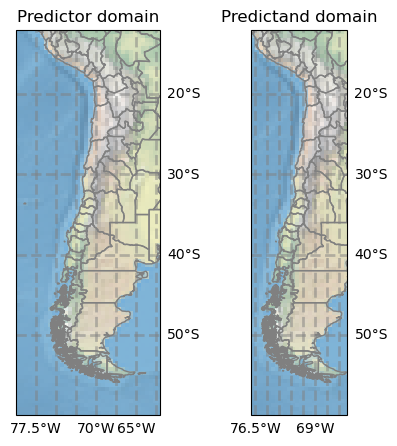

In [8]:
pycpt.plot_domains(download_args['predictor_extent'], download_args['predictand_extent'])

#### Download Observations, Hindcasts, and Forecasts from IRI Data Library

In [9]:
Y, hindcast_data, forecast_data = pycpt.download_data(predictand_name, local_predictand_file, predictor_names, download_args, domain_dir, force_download)

URL: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.CanSIPS-IC3/.FORECAST/.MONTHLY/.prec/S/%280000%201%20May%202023%29/VALUES/L/1.5/1.5/RANGEEDGES/%5BL%5D//keepgrids/average/%5BM%5D/average/Y/-60/-12/RANGEEDGES/X/-80/-62/RANGEEDGES/30/mul/-999/setmissing_value/%5BX/Y%5D%5BL/S/add%5D/cptv10.tsv

DOWNLOADING: [*************************] (14 KB) 0:00:01.973295
URL: https://iridl.ldeo.columbia.edu/SOURCES/.EU/.Copernicus/.CDS/.C3S/.ECMWF/.SEAS51_Y180/.forecast/.prcp/S/%280000%201%20May%202023%29/VALUES/L/1.5/1.5/RANGEEDGES/%5BL%5D//keepgrids/average/Y/-60/-12/RANGEEDGES/X/-80/-62/RANGEEDGES/%5BM%5D/average/c%3A/1000/(mm%20m-1)/%3Ac/mul/c%3A/86400/(s%20day-1)/%3Ac/mul/c%3A/30//units/(days)/def/%3Ac/mul/-999/setmissing_value/%5BX/Y%5D%5BL/S/add%5D/cptv10.tsv

DOWNLOADING: [*************************] (14 KB) 0:00:02.976823
URL: https://iridl.ldeo.columbia.edu/SOURCES/.Chile/.DMC/.stations/.monthly_prec/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.alt//name//elev/def/%3Aa%3A/.lon//name//X/def/%

#### Perform CPT Analysis
Set `interactive = True` to see detailed output from CPT.

In [10]:
interactive = False

In [11]:
hcsts, fcsts, skill, pxs, pys = pycpt.evaluate_models(hindcast_data, MOS, Y, forecast_data, cpt_args, domain_dir, predictor_names, interactive)

#### Plot skill of individual models

Deterministic skill metrics:
- pearson
- spearman
- two_alternative_forced_choice
- roc_area_below_normal (Area under ROC curve for Below Normal category)
- roc_area_above_normal (Area under ROC curve for Above Normal category)

Probabilistic skill metrics (in sample):
- generalized_roc
- rank_probability_skill_score

In [12]:
skill_metrics = [
    "pearson",
    "spearman",
    "two_alternative_forced_choice",
    "roc_area_below_normal",
    "roc_area_above_normal",
]

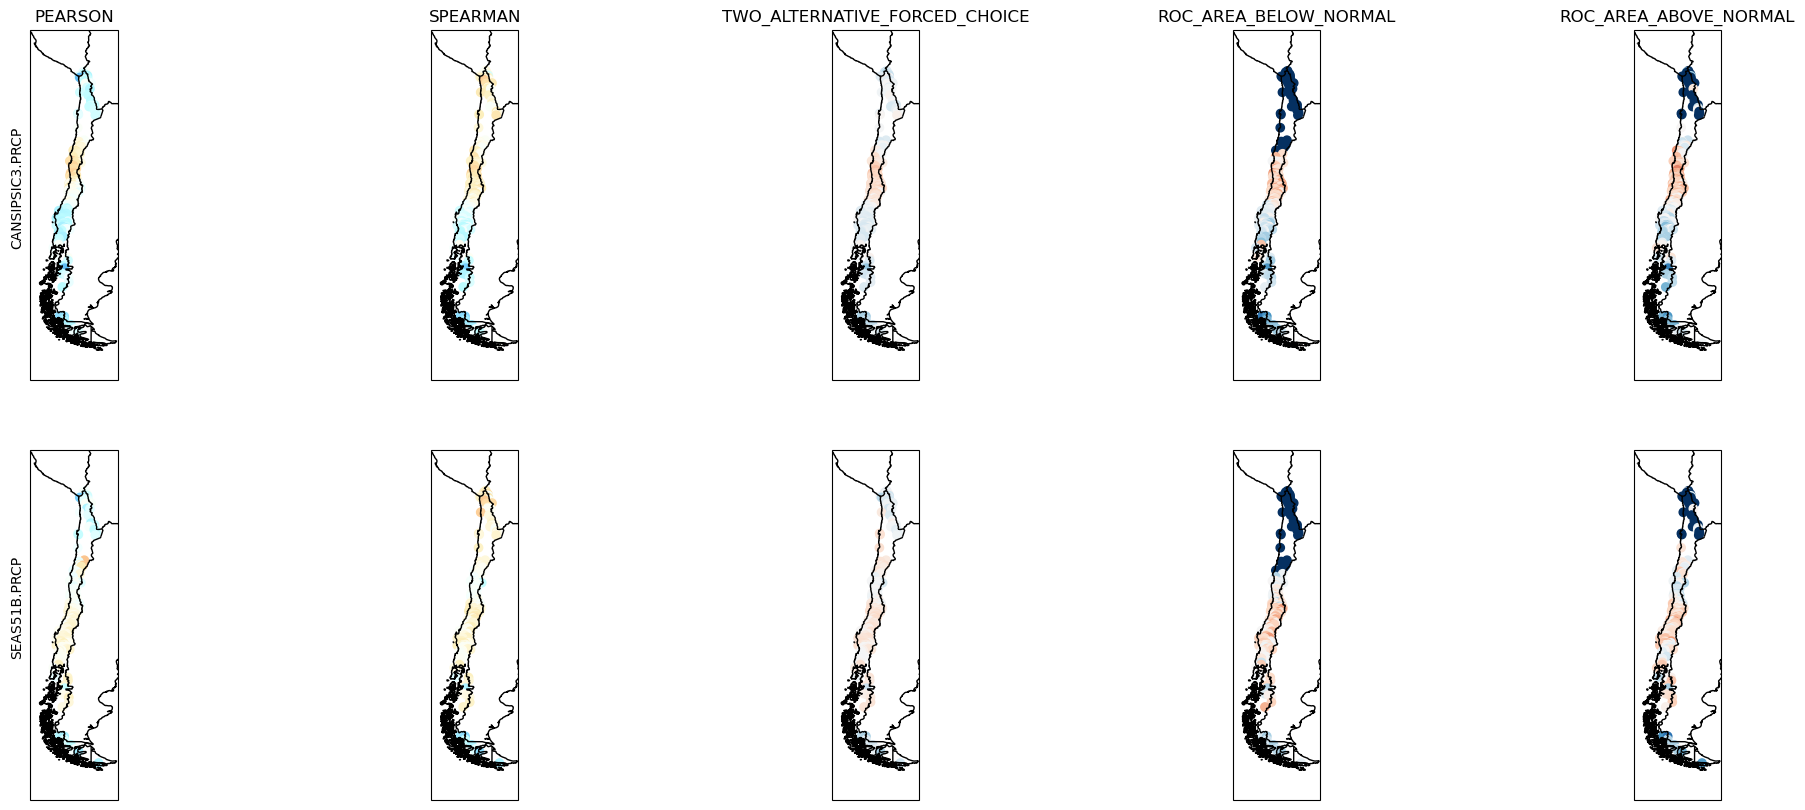

In [13]:
pycpt.plot_skill(predictor_names, skill, MOS, domain_dir, skill_metrics, domain=download_args['predictand_extent'])

#### Plot EOF Modes

In [14]:
#If you wish to use a color bar different from the default one, adjust the value below; Otherwise, use 'None'.
eof_colors = None

CANSIPSIC3.PRCP: EOF 1


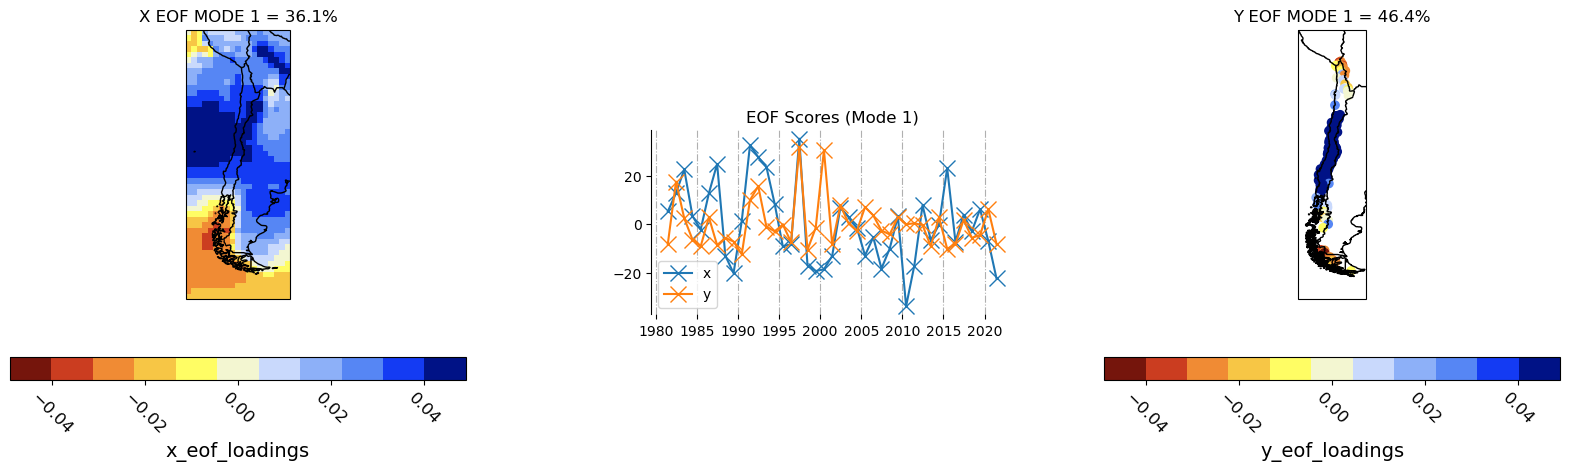

CANSIPSIC3.PRCP: EOF 2


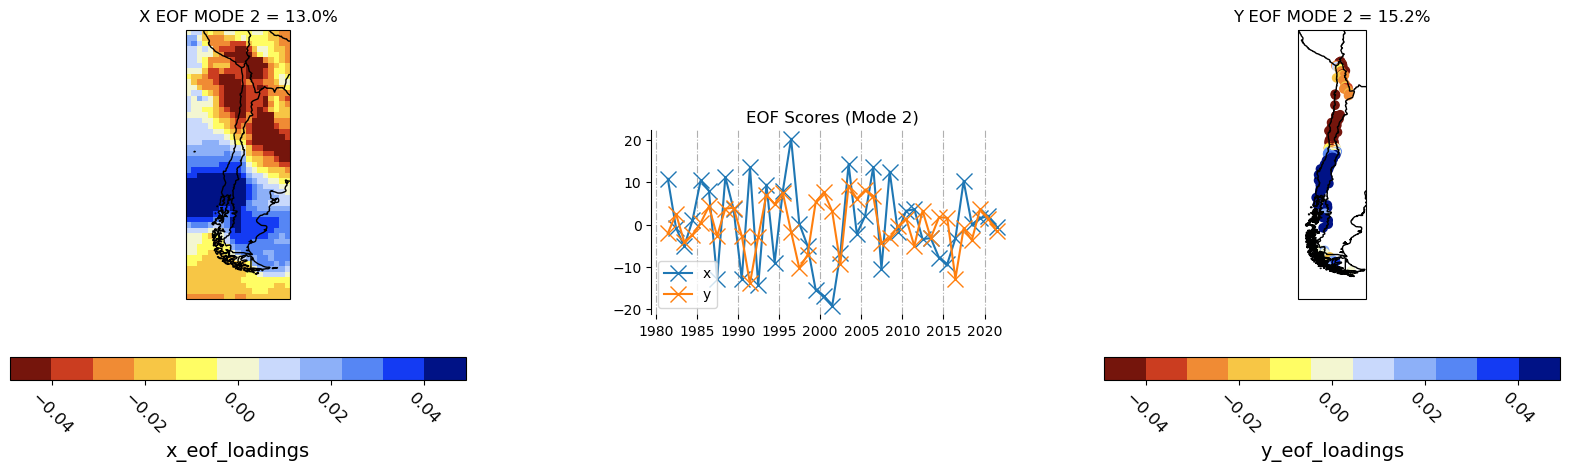

CANSIPSIC3.PRCP: EOF 3


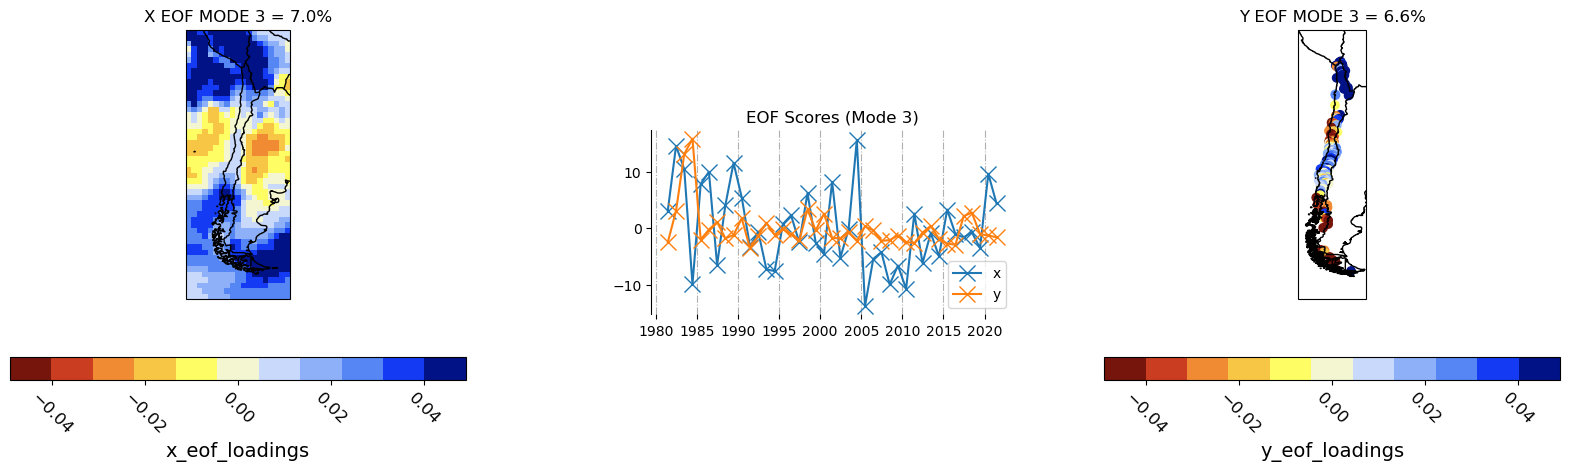

CANSIPSIC3.PRCP: EOF 4


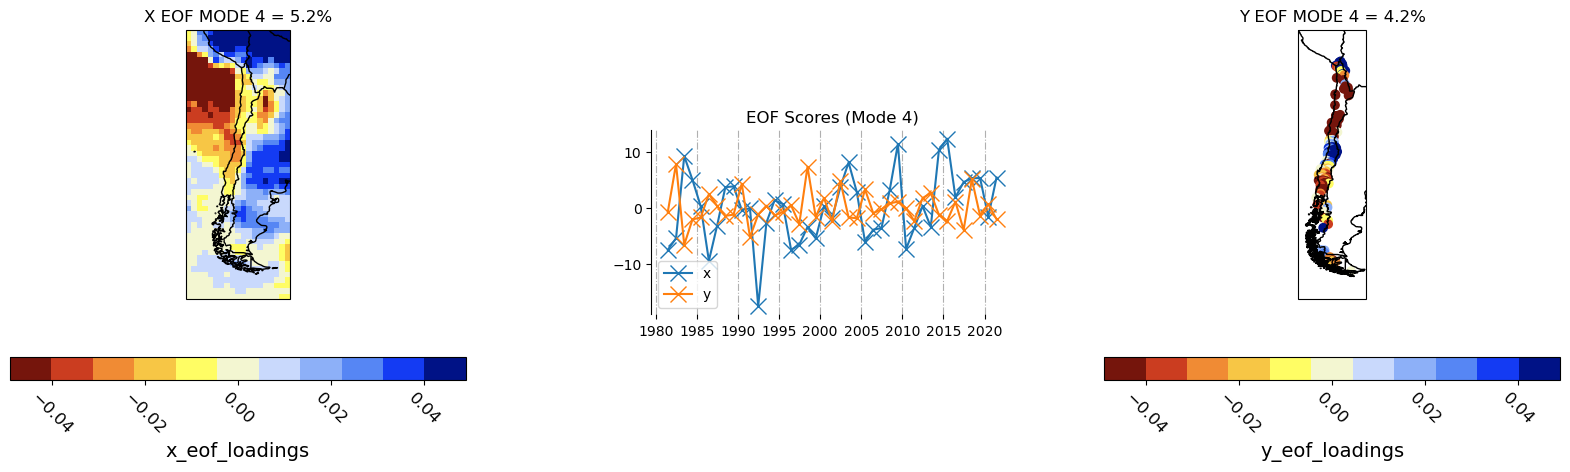

CANSIPSIC3.PRCP: EOF 5


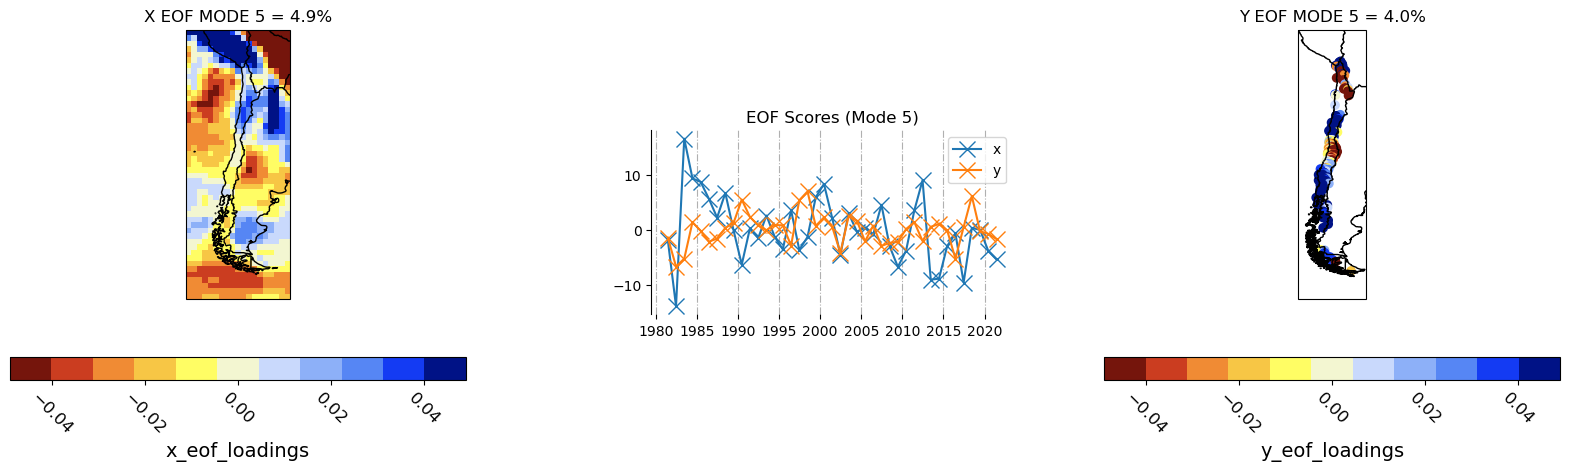

SEAS51B.PRCP: EOF 1


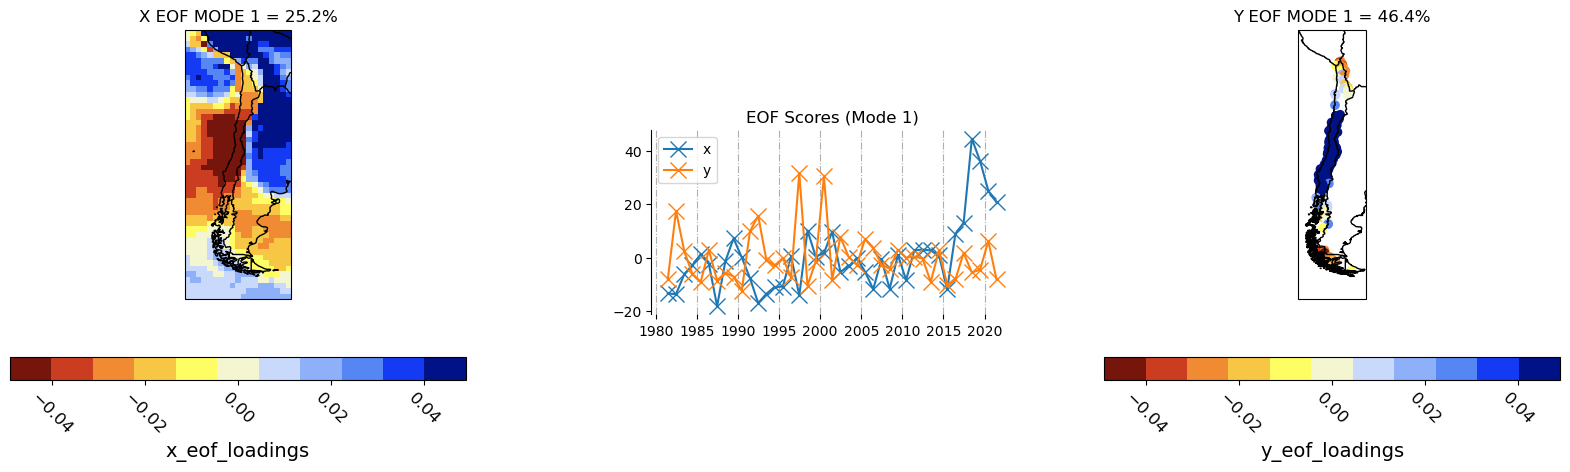

SEAS51B.PRCP: EOF 2


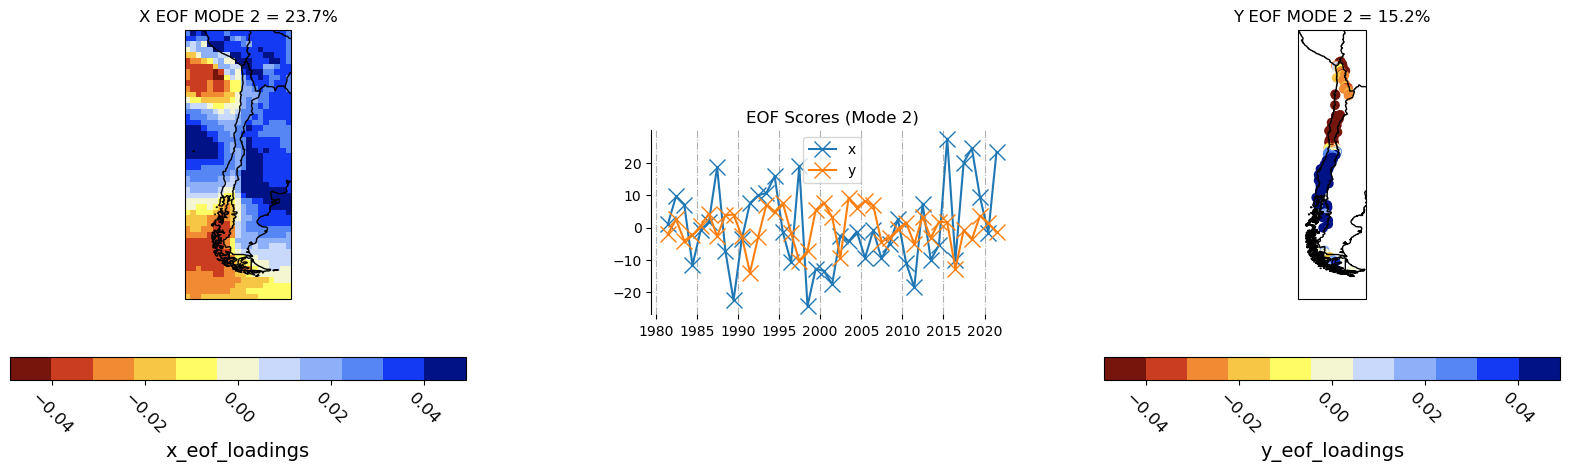

SEAS51B.PRCP: EOF 3


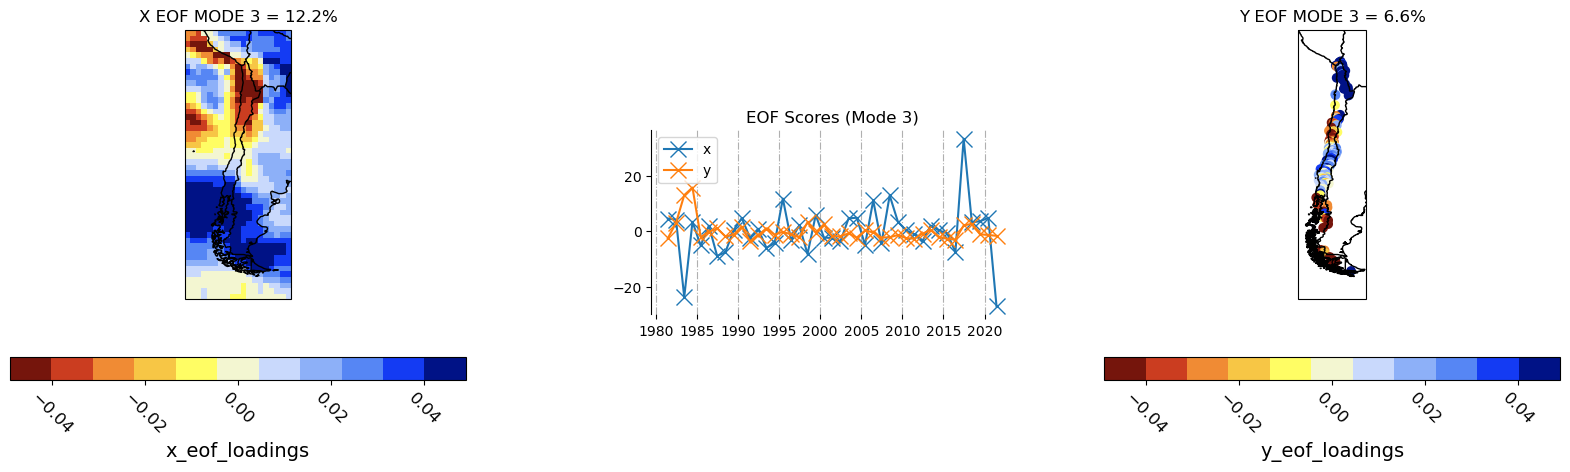

SEAS51B.PRCP: EOF 4


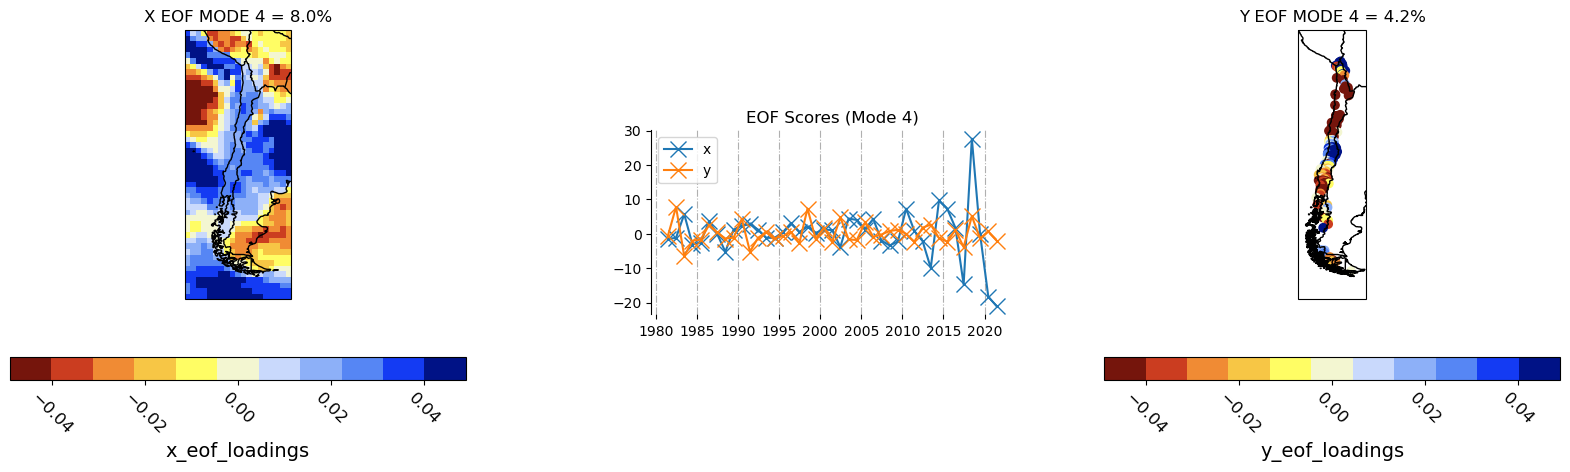

SEAS51B.PRCP: EOF 5


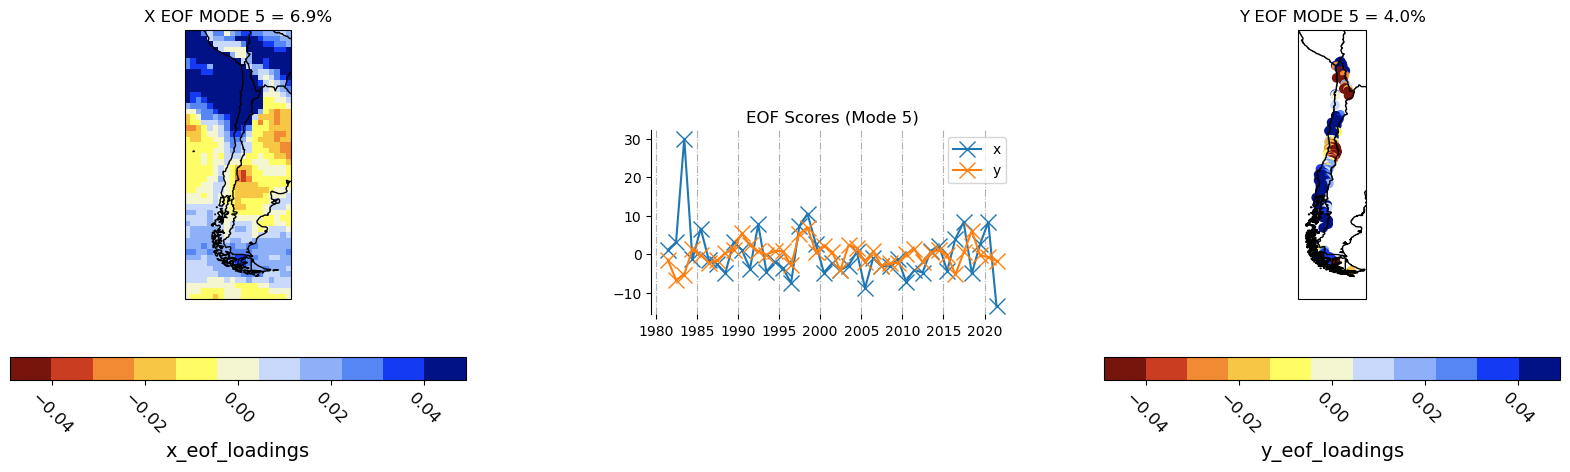

In [15]:
pycpt.plot_eof_modes(MOS, predictor_names, pxs, pys, domain_dir, domain=download_args['predictand_extent'], color_bar=eof_colors)

#### Plot CCA Modes

CANSIPSIC3.PRCP: CCA MODE 1 - Canonical Correlation = 0.67


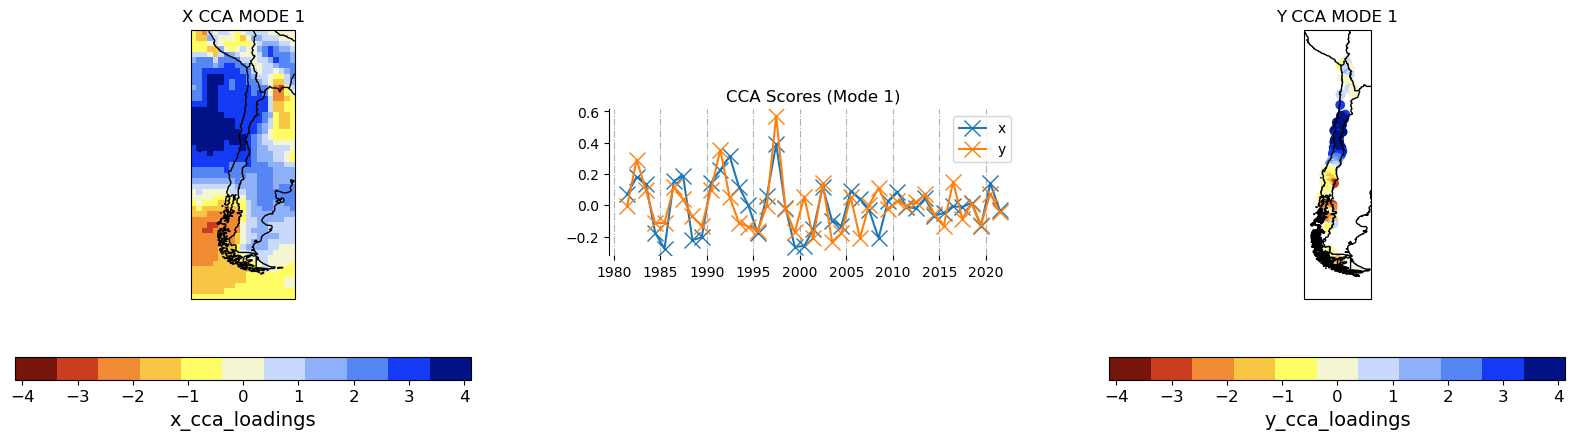

CANSIPSIC3.PRCP: CCA MODE 2 - Canonical Correlation = 0.65


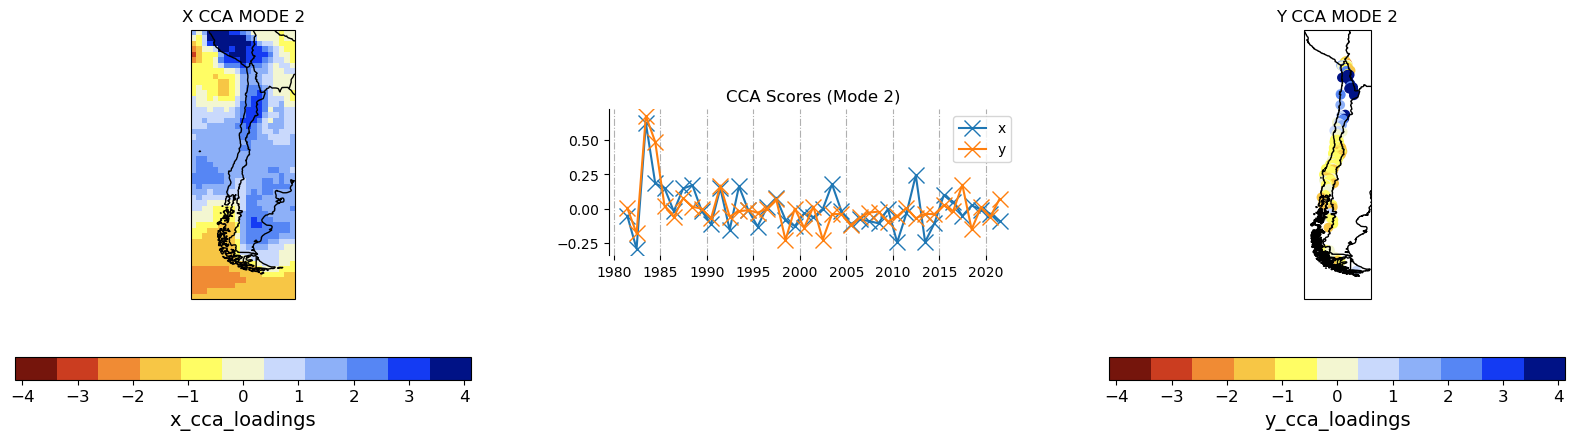

CANSIPSIC3.PRCP: CCA MODE 3 - Canonical Correlation = nan


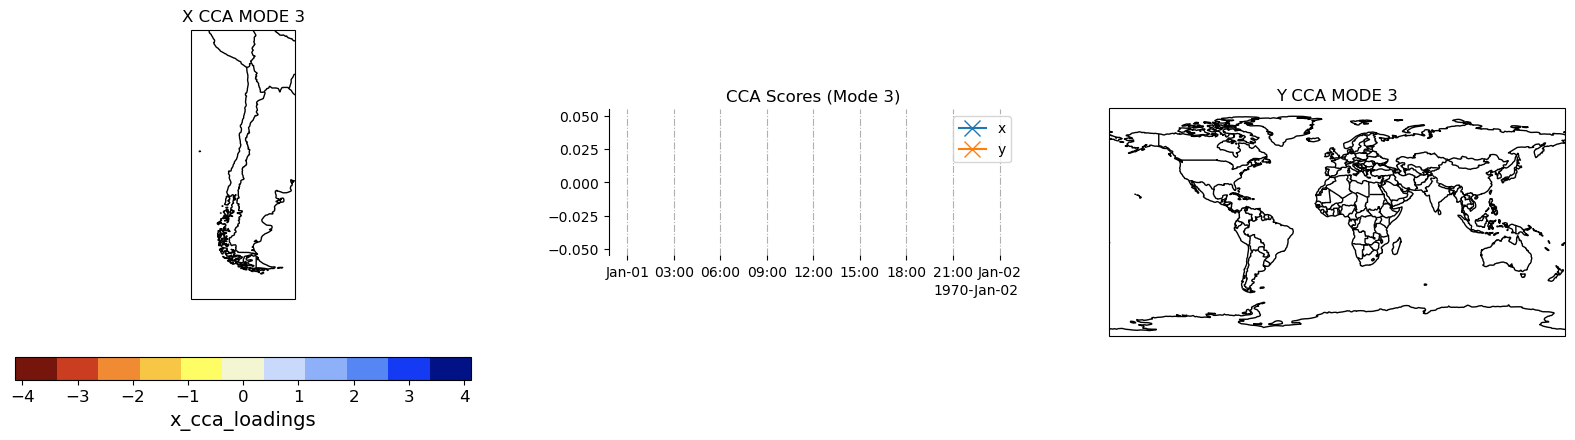

SEAS51B.PRCP: CCA MODE 1 - Canonical Correlation = 0.64


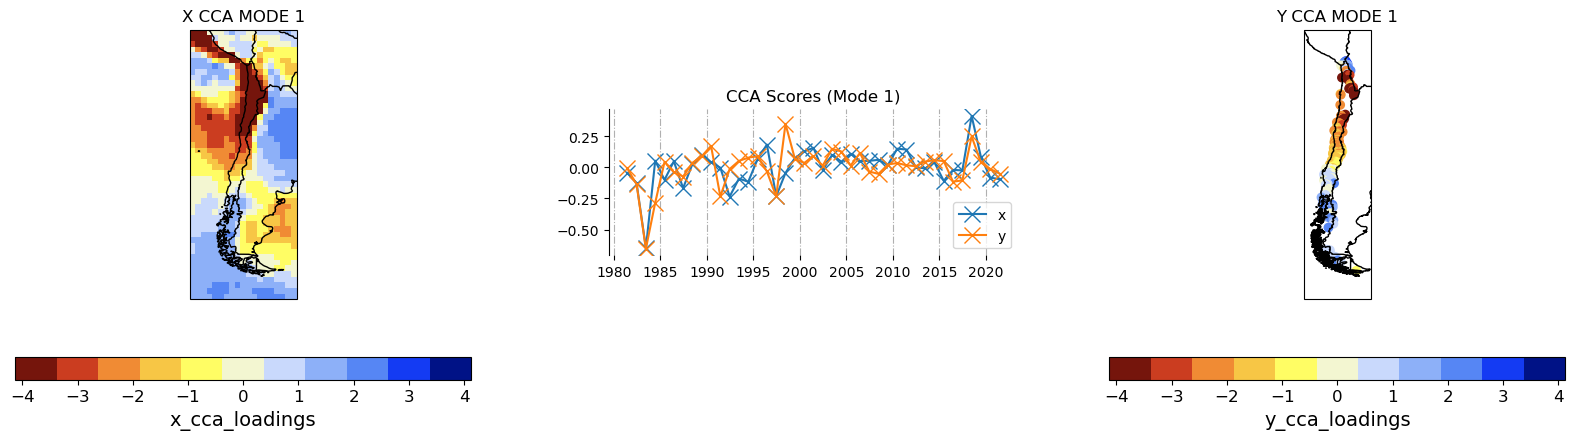

SEAS51B.PRCP: CCA MODE 2 - Canonical Correlation = 0.47


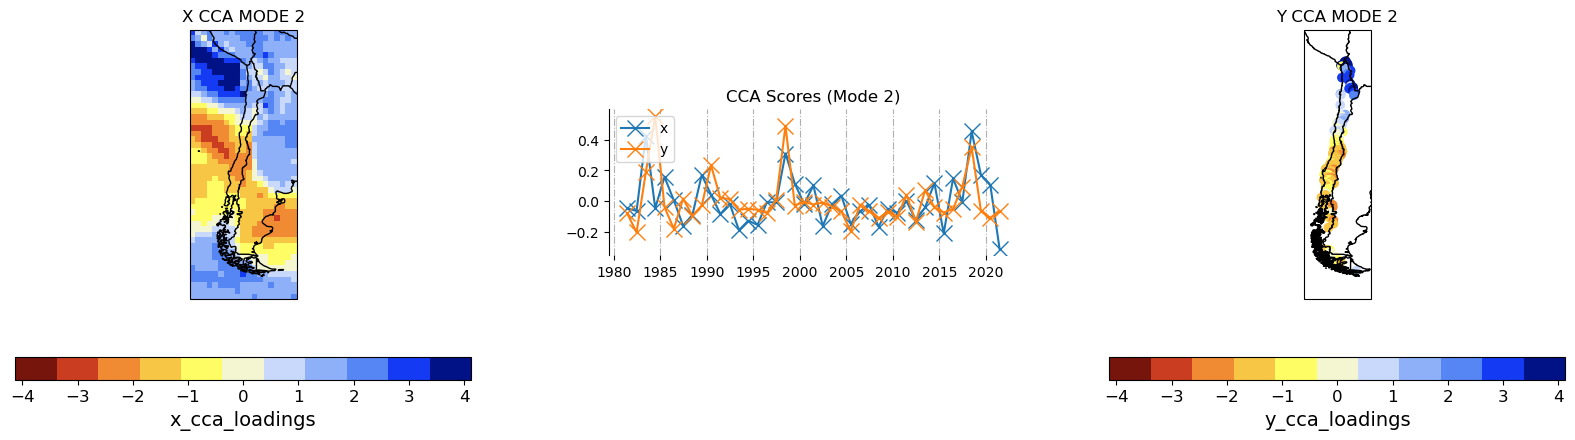

SEAS51B.PRCP: CCA MODE 3 - Canonical Correlation = 0.33


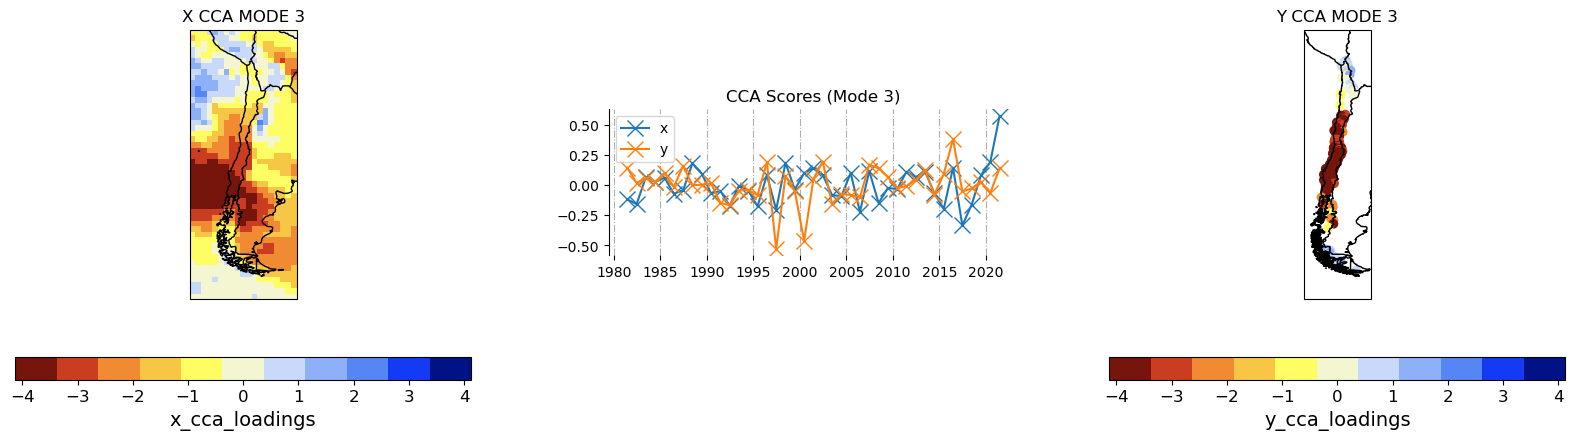

In [16]:
pycpt.plot_cca_modes(MOS, predictor_names, pxs, pys, domain_dir, domain=download_args['predictand_extent'], color_bar=eof_colors)

#### Plot Forecasts

In [17]:
#If you wish to change the color bar extremes of the deterministic forecast, adjust the values below; Otherwise, use 'None' .
vmin=None
vmax=None

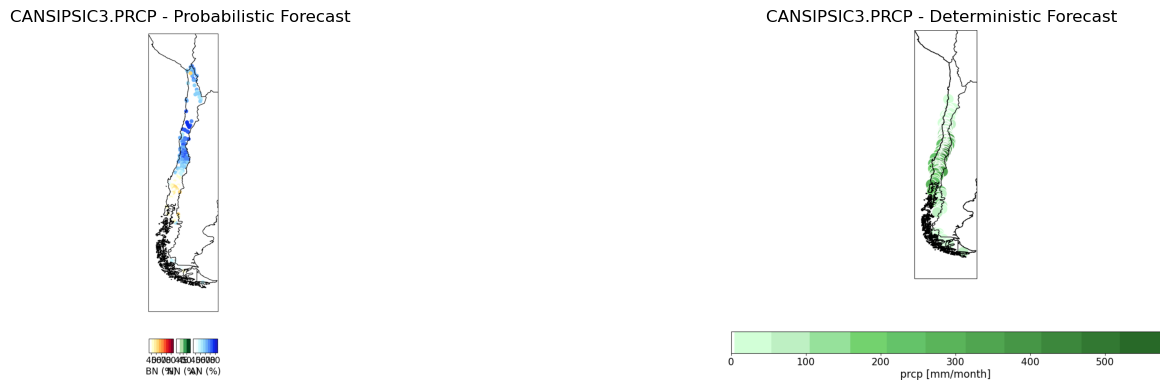

<Figure size 700x900 with 0 Axes>

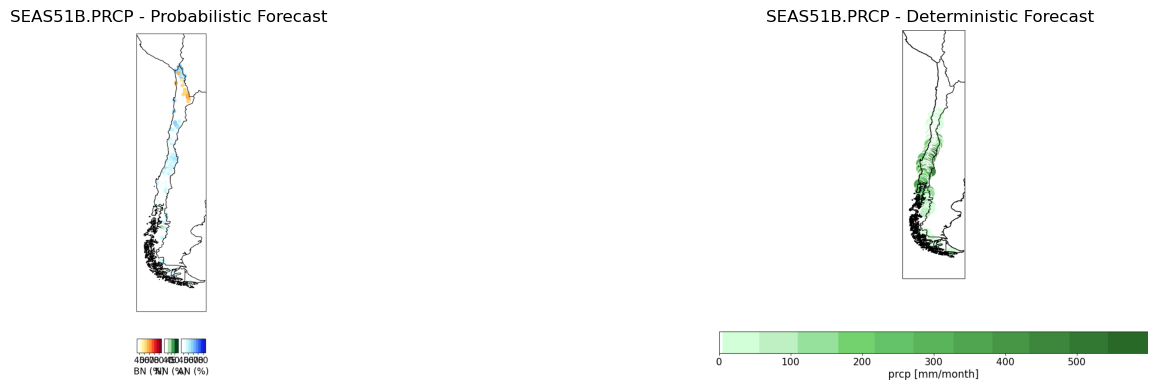

<Figure size 700x900 with 0 Axes>

In [18]:
pycpt.plot_forecasts(cpt_args, predictand_name, fcsts, domain_dir, predictor_names, MOS, domain=download_args['predictand_extent'],vmin=vmin,vmax=vmax)

# Multi-Model Ensemble

Choose which models to include in the MME, e.g.
```
ensemble = ['CFSv2.PRCP','SEAS5.PRCP']
```

In [19]:
ensemble = predictor_names

In [20]:
det_fcst, pr_fcst, pev_fcst, mme_skill = pycpt.construct_mme(fcsts, hcsts, Y, ensemble, predictor_names, cpt_args, domain_dir)

#### Plot MME Forecast Skill

Deterministic metrics: pearson, spearman, 2afc, roc_below, roc_above

Probabilistic metrics: generalized_roc, rank_probability_skill_score 

e.g.
```
skill_metrics = ["spearman", "generalized_roc"]
```

In [21]:
mme_skill_metrics = [
    "spearman",
    "2afc",
    "generalized_roc",
    "rank_probability_skill_score",
]

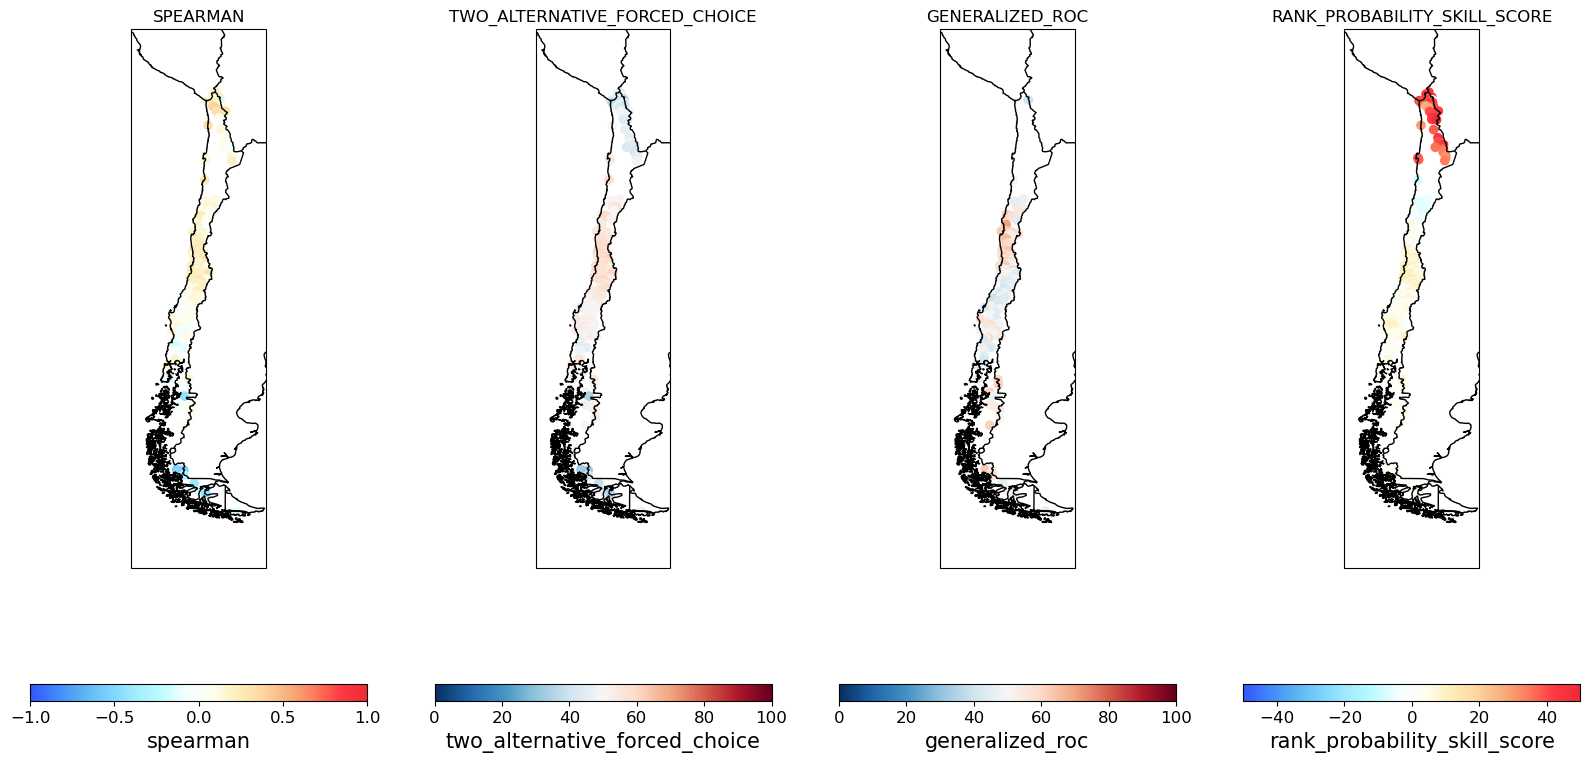

In [22]:
pycpt.plot_mme_skill(predictor_names, mme_skill, MOS, domain_dir, mme_skill_metrics, domain=download_args['predictand_extent'])

#### Plot MME Forecasts

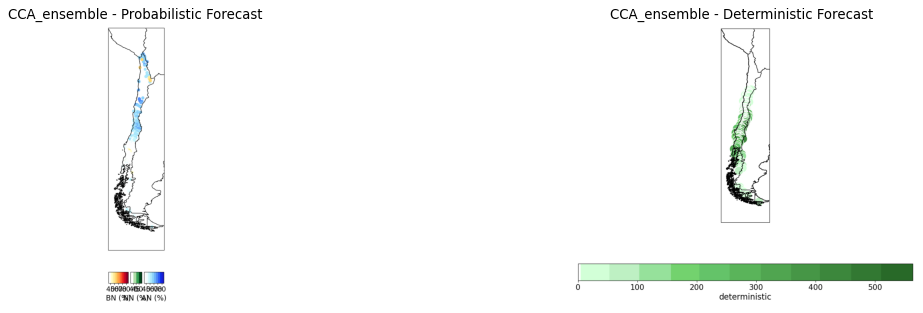

<Figure size 700x900 with 0 Axes>

In [23]:
pycpt.plot_mme_forecasts(cpt_args, predictand_name, pr_fcst, MOS, domain_dir, det_fcst, domain=download_args['predictand_extent'],vmin=vmin,vmax=vmax)

#### Construct MME Flexible Forecasts (full PDF)

If `isPercentile` is `True`, the threshold is a percentile (e.g., 0.5)
else in the unit of the predictand (e.g., mm, degC, ...)

In [24]:
threshold = 0.5
isPercentile = True

In [25]:
exceedance_prob, fcst_scale, climo_scale, fcst_mu, climo_mu, Y2, ntrain, transformed_threshold = pycpt.construct_flex_fcst(MOS, cpt_args, det_fcst, threshold, isPercentile, Y, pev_fcst)

#### Plot Flexible MME Forecasts

Choose a gridpoint or station within the predictand domain to plot the forecast and climatological probability of exceedance and PDF curves.

If you want to use a different color bar than the one used by default, assign the name of the desired color bar to the variable `forecast_colors`, None value will use the default color bars. If you are unaware of the available color bars, run `get_colors_bars()`.

In [26]:
if 'Name' in Y.coords:
    print(Y['Name'].to_pandas().to_string())

station
1000005                              Visviri
1200002                     Villa Industrial
1200003                            Humalpaca
1201010                            Alcerreca
1001005                              Caquena
1202010                                Putre
1020017                           Parinacota
1020016                              Chucuyo
1010007                             Chungara
180005                  Arica Chacalluta Ap.
1300006                           Chapiquiña
1300007                                Belen
1021007                           Guallatire
1310019                                Azapa
1300008                             Tignamar
1030003                             Chilcaya
180011                                 Codpa
1502007                              Esquiña
1041003                             Colchane
1611001                               Camiña
1730017                               Poroma
1740001                                Parca
10

In [27]:
# Note that station ID is always a string, even if it happens to represent a number.
if 'station' in Y.coords:
    location_selector = {'station': '220024'}
else:
    location_selector = {'Y': -33.5, 'X': -70.6}
forecast_colors = None

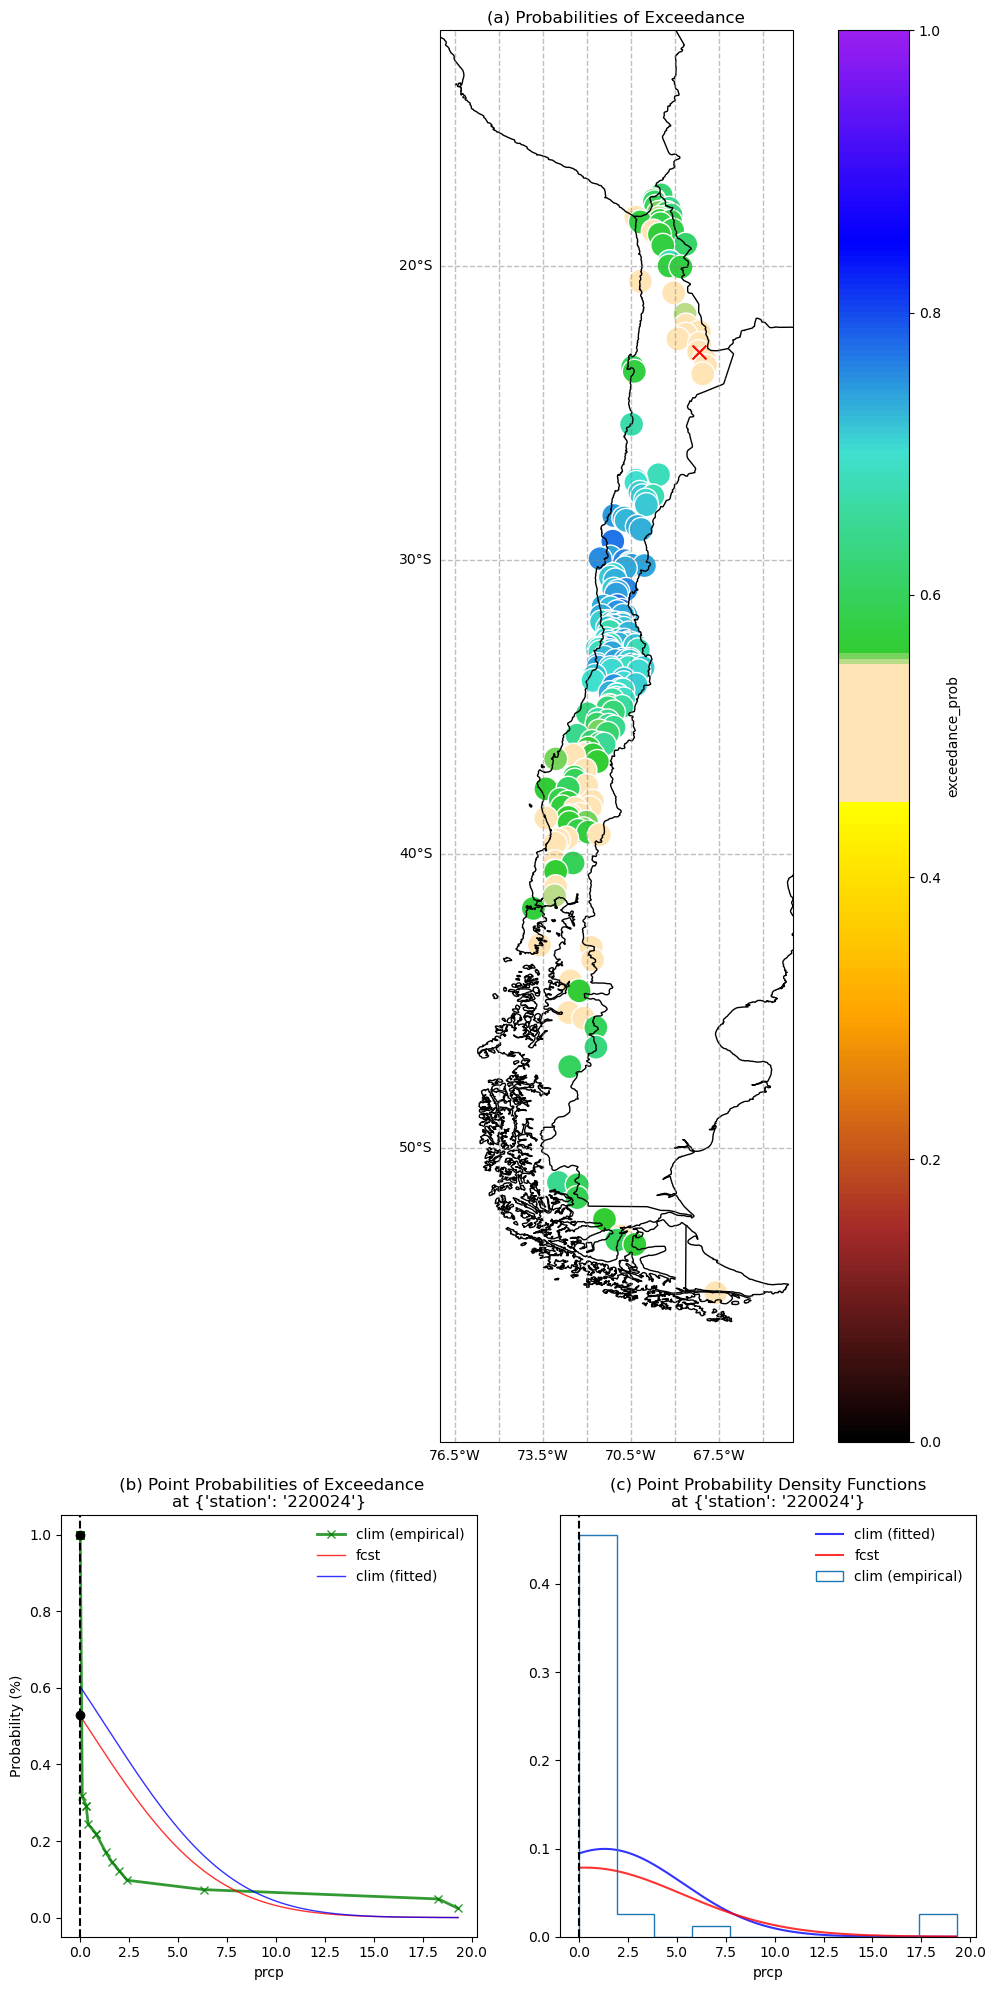

In [28]:
pycpt.plot_mme_flex_forecast_v2(predictand_name, exceedance_prob, transformed_threshold, fcst_scale, climo_scale, fcst_mu, climo_mu, Y, Y2, ntrain, MOS, domain_dir, location_selector=location_selector, color_bar=forecast_colors,domain=download_args['predictand_extent'])    

These final cells record information about the python environment that will be useful if we need to reproduce this configuration in the future.

In [29]:
!conda list

# packages in environment at /Users/xandre/opt/anaconda3/envs/pycpt-2.9.0:
#
# Name                    Version                   Build  Channel
anyio                     4.6.2.post1        pyhd8ed1ab_0    conda-forge
appnope                   0.1.4              pyhd8ed1ab_0    conda-forge
argon2-cffi               23.1.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py312hb553811_5    conda-forge
arrow                     1.3.0              pyhd8ed1ab_0    conda-forge
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
async-lru                 2.0.4              pyhd8ed1ab_0    conda-forge
attrs                     24.2.0             pyh71513ae_0    conda-forge
aws-c-auth                0.7.31               h821ce02_5    conda-forge
aws-c-cal                 0.7.4                hcd44f14_4    conda-forge
aws-c-common              0.9.31               ha44c9a9_0    conda-forge
aws-c-compression         0.2.19               hcd44f

In [30]:
!conda list --explicit

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: osx-64
@EXPLICIT
https://conda.anaconda.org/conda-forge/osx-64/aws-c-common-0.9.31-ha44c9a9_0.conda
https://conda.anaconda.org/conda-forge/osx-64/bzip2-1.0.8-hfdf4475_7.conda
https://conda.anaconda.org/conda-forge/osx-64/c-ares-1.34.2-h32b1619_0.conda
https://conda.anaconda.org/conda-forge/osx-64/ca-certificates-2024.8.30-h8857fd0_0.conda
https://conda.anaconda.org/conda-forge/osx-64/icu-75.1-h120a0e1_0.conda
https://conda.anaconda.org/conda-forge/osx-64/libbrotlicommon-1.1.0-h00291cd_2.conda
https://conda.anaconda.org/conda-forge/osx-64/libcxx-19.1.3-hf95d169_0.conda
https://conda.anaconda.org/conda-forge/osx-64/libdeflate-1.22-h00291cd_0.conda
https://conda.anaconda.org/conda-forge/osx-64/libedit-3.1.20191231-h0678c8f_2.tar.bz2
https://conda.anaconda.org/conda-forge/osx-64/libev-4.33-h10d778d_2.conda
https://conda.anaconda.org/conda-forge/osx-64/libexpat-2.6.3-hac325c4